# 贝叶斯决策论 lab1

In [1]:
import numpy as np    #计算数据
import matplotlib.pyplot as plt  #绘制图线
import xlrd  #读取数据

In [2]:
#均值计算函数 计算出u
def get_u(x):
    u = np.mean(x,axis=0)   #计算每一列的均值u
    return u

In [3]:
#计算协方差矩阵 sigmal
def get_sigmal(x):
    sigmal = np.cov(np.mat(x).T)
    return sigmal

In [4]:
#根据式(49)计算判别函数的值
def get_gi(x,u,sigmal,pw,d):
    #将各个数据转换为np.array矩阵形式
    x = np.mat(x)
    u = np.mat(u)
    sigmal = np.mat(sigmal)
    pw=np.mat(pw)
    
    #根据公式49计算判别函数的值
    g = -0.5 * (x - u) * sigmal.I * (x - u).T - d / 2 * np.log(2 * np.pi) - 0.5 * np.log(np.linalg.det(sigmal)) + np.log(pw)
    return g

In [2]:
def get_data():
    x = []    #存放最终的数据
    data = xlrd.open_workbook("data.xls")   #加载表格文件
    table = data.sheets()[0]   #选取工作簿 sheet1
    rows = table.nrows        #表格的总行数
    for i in range(0, rows):    #遍历每一行读取数据
        row_value = table.row_values(i)
        print("row value={}".format(row_value))
        if row_value[3] != 3:   #x3不需要添加进去因为p(x3)=0
            x.append(row_value)
    print("----------------------")
    print("------数据读取完毕------")
    print("----------------------")
    print("")
    print("")
    return x

In [3]:
get_data()

row value=[-5.01, -8.12, -3.68, 1.0]
row value=[-0.91, -0.18, -0.05, 2.0]
row value=[5.35, 2.26, 8.13, 3.0]
row value=[-5.43, -3.48, -3.54, 1.0]
row value=[1.3, -2.06, -3.53, 2.0]
row value=[5.12, 3.22, -2.66, 3.0]
row value=[1.08, -5.52, 1.66, 1.0]
row value=[-7.75, -4.54, -0.95, 2.0]
row value=[-1.34, -5.31, -9.87, 3.0]
row value=[0.86, -3.78, -4.11, 1.0]
row value=[-5.47, 0.5, 3.92, 2.0]
row value=[4.48, 3.42, 5.19, 3.0]
row value=[-2.67, 0.63, 7.39, 1.0]
row value=[6.14, 5.72, -4.85, 2.0]
row value=[7.11, 2.39, 9.21, 3.0]
row value=[4.94, 3.29, 2.08, 1.0]
row value=[3.6, 1.26, 4.36, 2.0]
row value=[7.17, 4.33, -0.98, 3.0]
row value=[-2.51, 2.09, -2.59, 1.0]
row value=[5.37, -4.63, -3.65, 2.0]
row value=[5.75, 3.97, 6.65, 3.0]
row value=[-2.25, -2.13, -6.94, 1.0]
row value=[7.18, 1.46, -6.66, 2.0]
row value=[0.77, 0.27, 2.41, 3.0]
row value=[5.56, 2.86, -2.26, 1.0]
row value=[-7.39, 1.17, 6.3, 2.0]
row value=[0.9, -0.43, -8.71, 3.0]
row value=[1.03, -3.33, 4.33, 1.0]
row value=[-7.5

[[-5.01, -8.12, -3.68, 1.0],
 [-0.91, -0.18, -0.05, 2.0],
 [-5.43, -3.48, -3.54, 1.0],
 [1.3, -2.06, -3.53, 2.0],
 [1.08, -5.52, 1.66, 1.0],
 [-7.75, -4.54, -0.95, 2.0],
 [0.86, -3.78, -4.11, 1.0],
 [-5.47, 0.5, 3.92, 2.0],
 [-2.67, 0.63, 7.39, 1.0],
 [6.14, 5.72, -4.85, 2.0],
 [4.94, 3.29, 2.08, 1.0],
 [3.6, 1.26, 4.36, 2.0],
 [-2.51, 2.09, -2.59, 1.0],
 [5.37, -4.63, -3.65, 2.0],
 [-2.25, -2.13, -6.94, 1.0],
 [7.18, 1.46, -6.66, 2.0],
 [5.56, 2.86, -2.26, 1.0],
 [-7.39, 1.17, 6.3, 2.0],
 [1.03, -3.33, 4.33, 1.0],
 [-7.5, -6.32, -0.31, 2.0]]

In [6]:
def get_Bhattacharyya(u1,u2,sigmal1,sigmal2,pw1,pw2,d):
    #计算Bhattacharyya界的值
    
    #数据类型归一为np.matrix 
    sigmal1= np.mat(sigmal1)
    sigmal2 = np.mat(sigmal2)
    u1 = np.mat(u1)
    u2 = np.mat(u2)
    
    #数据验证 便于纠错
    print("-------Bhattacharyya参数验证--------")
    print("parameter and their type:")
    print("u1:",u1,"type:",type(u1))
    print("u2:",u2,"type:",type(u2))
    print("sigmal1:",sigmal1,"type:",type(sigmal1))
    print("sigmal2:",sigmal2,"type:",type(sigmal2))
    print("pw1:",pw1,"type:",type(pw1))
    print("pw2:",pw2,"type:",type(pw2))
    print("d:",d,"type:",type(d))
    if d == 1:
        k_half = (1/8) * (u2-u1).T*((sigmal1+sigmal2)/2).I*(u2-u1)+(1/2)*np.log(np.linalg.det((sigmal1+sigmal2)/2)/np.sqrt(np.linalg.det(sigmal1)*np.linalg.det(sigmal2)))
    else:
        k_half = (1/8) * (u2-u1)*((sigmal1+sigmal2)/2).I*(u2-u1).T+(1/2)*np.log(np.linalg.det((sigmal1+sigmal2)/2)/np.sqrt(np.linalg.det(sigmal1)*np.linalg.det(sigmal2)))
    
    #由公式(76)算出Perror
    Perror = np.sqrt(np.array(pw1*pw2))*np.exp(-k_half)
    print("-------Bhattacharyya计算完毕--------")
    print("------------------------------------")
    print("")
    print("")
    return Perror

In [7]:
def ClassifyTest(di):
    # 分类器函数 参数di为特征维度值
    d = di  #特征维度
    g = [0,0,0]       
    pw = (0.5,0.5,0)  #先验概率
    u = [0,0,0]   #各个维度的均值
    sigmal = [0,0,0]   #各个维度的协方差矩阵
    count_true = 0
    count_false = 0
    num =0
    data=get_data()  # 读取数据
    
#     print("类型",type(np.mat(sigmal[0])))
#     print(type(sigmal[0]))
#     print("sigmal1",sigmal[0])
    for i in range(len(pw)-1):
        xi = [x[:d] for x in filter(lambda x :x[3] == i+1,data)]  #获得每一个类别的对应特征
        u[i] = get_u(xi)
        sigmal[i] = get_sigmal(xi)
        print("i={}".format(i))
        print("第{}个类别对应的参数".format(i+1))
        print("xi={}".format(xi))
        print("ui={}".format(u[i]))
        print("sigmali={}".format(sigmal[i]))
        print("----------------")
        print("")
        print("")
    
    Bbound = get_Bhattacharyya(u[0],u[1],sigmal[0],sigmal[1],pw[0],pw[1],d)
    for i in range(len(data)):
        if i%2==0:
            num+=1
        print("第{}个样本点".format(num))
        x= data[i][:d]
        w = data[i][3]
        print("x = ",x)
        g[0] = get_gi(x,u[0],sigmal[0],pw[0],d)
        g[1] = get_gi(x,u[1],sigmal[1],pw[1],d)
        print("g1(x) ={}".format(g[0]), "g2(x) ={}".format(g[1]))
        if g[0] > g[1]:   #根据判别函数的值去进行比对分类
            flag = w == 1
            print("w1", flag)
        else:
            flag = w == 2
            print("w2", flag)
        if flag:
            count_true += 1
        else:
            count_false += 1
    error_rate = (count_false)/(count_true+count_false)
    print("经验训练误差：{}".format(error_rate))
    print("Bhattacharyya={}".format(Bbound))
    print("")
    print("")
    return error_rate,Bbound

In [8]:
oneData = ClassifyTest(1)

row value=[-5.01, -8.12, -3.68, 1.0]
row value=[-0.91, -0.18, -0.05, 2.0]
row value=[5.35, 2.26, 8.13, 3.0]
row value=[-5.43, -3.48, -3.54, 1.0]
row value=[1.3, -2.06, -3.53, 2.0]
row value=[5.12, 3.22, -2.66, 3.0]
row value=[1.08, -5.52, 1.66, 1.0]
row value=[-7.75, -4.54, -0.95, 2.0]
row value=[-1.34, -5.31, -9.87, 3.0]
row value=[0.86, -3.78, -4.11, 1.0]
row value=[-5.47, 0.5, 3.92, 2.0]
row value=[4.48, 3.42, 5.19, 3.0]
row value=[-2.67, 0.63, 7.39, 1.0]
row value=[6.14, 5.72, -4.85, 2.0]
row value=[7.11, 2.39, 9.21, 3.0]
row value=[4.94, 3.29, 2.08, 1.0]
row value=[3.6, 1.26, 4.36, 2.0]
row value=[7.17, 4.33, -0.98, 3.0]
row value=[-2.51, 2.09, -2.59, 1.0]
row value=[5.37, -4.63, -3.65, 2.0]
row value=[5.75, 3.97, 6.65, 3.0]
row value=[-2.25, -2.13, -6.94, 1.0]
row value=[7.18, 1.46, -6.66, 2.0]
row value=[0.77, 0.27, 2.41, 3.0]
row value=[5.56, 2.86, -2.26, 1.0]
row value=[-7.39, 1.17, 6.3, 2.0]
row value=[0.9, -0.43, -8.71, 3.0]
row value=[1.03, -3.33, 4.33, 1.0]
row value=[-7.5

In [9]:
twoData = ClassifyTest(2)

row value=[-5.01, -8.12, -3.68, 1.0]
row value=[-0.91, -0.18, -0.05, 2.0]
row value=[5.35, 2.26, 8.13, 3.0]
row value=[-5.43, -3.48, -3.54, 1.0]
row value=[1.3, -2.06, -3.53, 2.0]
row value=[5.12, 3.22, -2.66, 3.0]
row value=[1.08, -5.52, 1.66, 1.0]
row value=[-7.75, -4.54, -0.95, 2.0]
row value=[-1.34, -5.31, -9.87, 3.0]
row value=[0.86, -3.78, -4.11, 1.0]
row value=[-5.47, 0.5, 3.92, 2.0]
row value=[4.48, 3.42, 5.19, 3.0]
row value=[-2.67, 0.63, 7.39, 1.0]
row value=[6.14, 5.72, -4.85, 2.0]
row value=[7.11, 2.39, 9.21, 3.0]
row value=[4.94, 3.29, 2.08, 1.0]
row value=[3.6, 1.26, 4.36, 2.0]
row value=[7.17, 4.33, -0.98, 3.0]
row value=[-2.51, 2.09, -2.59, 1.0]
row value=[5.37, -4.63, -3.65, 2.0]
row value=[5.75, 3.97, 6.65, 3.0]
row value=[-2.25, -2.13, -6.94, 1.0]
row value=[7.18, 1.46, -6.66, 2.0]
row value=[0.77, 0.27, 2.41, 3.0]
row value=[5.56, 2.86, -2.26, 1.0]
row value=[-7.39, 1.17, 6.3, 2.0]
row value=[0.9, -0.43, -8.71, 3.0]
row value=[1.03, -3.33, 4.33, 1.0]
row value=[-7.5

In [10]:
threeData = ClassifyTest(3)

row value=[-5.01, -8.12, -3.68, 1.0]
row value=[-0.91, -0.18, -0.05, 2.0]
row value=[5.35, 2.26, 8.13, 3.0]
row value=[-5.43, -3.48, -3.54, 1.0]
row value=[1.3, -2.06, -3.53, 2.0]
row value=[5.12, 3.22, -2.66, 3.0]
row value=[1.08, -5.52, 1.66, 1.0]
row value=[-7.75, -4.54, -0.95, 2.0]
row value=[-1.34, -5.31, -9.87, 3.0]
row value=[0.86, -3.78, -4.11, 1.0]
row value=[-5.47, 0.5, 3.92, 2.0]
row value=[4.48, 3.42, 5.19, 3.0]
row value=[-2.67, 0.63, 7.39, 1.0]
row value=[6.14, 5.72, -4.85, 2.0]
row value=[7.11, 2.39, 9.21, 3.0]
row value=[4.94, 3.29, 2.08, 1.0]
row value=[3.6, 1.26, 4.36, 2.0]
row value=[7.17, 4.33, -0.98, 3.0]
row value=[-2.51, 2.09, -2.59, 1.0]
row value=[5.37, -4.63, -3.65, 2.0]
row value=[5.75, 3.97, 6.65, 3.0]
row value=[-2.25, -2.13, -6.94, 1.0]
row value=[7.18, 1.46, -6.66, 2.0]
row value=[0.77, 0.27, 2.41, 3.0]
row value=[5.56, 2.86, -2.26, 1.0]
row value=[-7.39, 1.17, 6.3, 2.0]
row value=[0.9, -0.43, -8.71, 3.0]
row value=[1.03, -3.33, 4.33, 1.0]
row value=[-7.5

In [11]:
errorVec = np.array([oneData[0],twoData[0],threeData[0]])
BboundVec = np.array([float(oneData[1]),float(twoData[1]),float(threeData[1])])

# errorVec.append(oneData[0])
# BboundVec.append(oneData[1])

# errorVec.append(twoData[0])
# BboundVec.append(twoData[1])

# errorVec.append(threeData[0])
# BboundVec.append(twoData[1])

In [12]:
errorVec

array([0.3 , 0.45, 0.15])

In [13]:
BboundVec

array([0.47399944, 0.46046616, 0.41192563])

In [14]:
# def draw(data1,data2):
#     plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']   # 显示中文
#     plt.title("Naive Bayes Lab1",fontdict={'fontname':'comic sans MS','fontsize':20})
#     plt.xlabel('Dimension')
#     plt.ylabel('Error')
#     x=range(1,4)
    
#     #plt.figure(figsize=(20, 8), dpi=80)
    
#     plt.plot(x, data1, label='经验训练误差', color='orange', linestyle=":", linewidth=1)
#     plt.plot(x, data2, label='Bhattacharyya', color='cyan', linestyle="-.")
#     plt.legend()
#     plt.savefig("Bayes.png")
#     plt.show()

In [22]:
def draw(data1,data2):
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']   # 显示中文
    plt.title("Lab1")
    plt.xlabel('Num')
    plt.ylabel('Value')
    x=range(1,4)
    
    #plt.figure(figsize=(20, 8), dpi=80)
    
    plt.plot(x, data1, label='经典训练误差', color='red', linestyle="-.")
    plt.plot(x, data2, label='Bhattacharyya', color='blue', linestyle=":")
    plt.legend()
    plt.show()

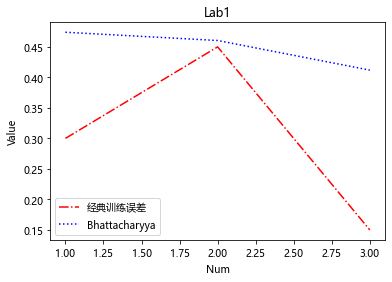

In [23]:
draw(errorVec,BboundVec)